In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MPI-ESM-MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01 1980-02-01 ... 2005-12-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01 1980-07-01 ... 2005-10-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [5]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [6]:
#data["pr"]["y"][287:337].values

In [7]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[2.09767086e-06, 2.10593180e-06, 2.11635142e-06, ...,
        2.07570247e-06, 2.08289430e-06, 2.08990605e-06],
       [1.74815511e-06, 1.73130627e-06, 1.71629415e-06, ...,
        1.79975416e-06, 1.77524089e-06, 1.75364846e-06],
       [1.81239261e-06, 1.72655200e-06, 1.66072766e-06, ...,
        2.01870421e-06, 1.96830024e-06, 1.84754958e-06],
       ...,
       [1.22156089e-05, 1.21427438e-05, 1.17095642e-05, ...,
        1.20029908e-05, 1.22129122e-05, 1.21305884e-05],
       [1.21449375e-05, 1.23230184e-05, 1.24068983e-05, ...,
        1.16279252e-05, 1.18668340e-05, 1.19405413e-05],
       [1.01221667e-05, 1.01356600e-05, 1.01434998e-05, ...,
        1.00555753e-05, 1.01283549e-05, 1.01248088e-05]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [9]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[0.18123876, 0.18195251, 0.18285276, ..., 0.17934069, 0.17996207,
        0.18056788],
       [0.1510406 , 0.14958486, 0.14828781, ..., 0.15549876, 0.15338081,
        0.15151523],
       [0.15659072, 0.14917409, 0.14348687, ..., 0.17441604, 0.17006114,
        0.15962828],
       ...,
       [1.05542861, 1.04913306, 1.01170635, ..., 1.03705841, 1.05519562,
        1.04808284],
       [1.0493226 , 1.06470879, 1.07195602, ..., 1.00465274, 1.02529446,
        1.03166277],
       [0.8745552 , 0.87572102, 0.87639838, ..., 0.86880171, 0.87508986,
        0.87478348]])
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

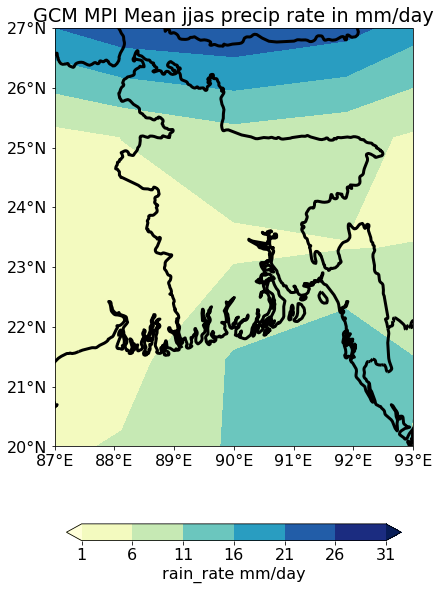

In [14]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('GCM MPI Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_mpi_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [11]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[2.0202283e-06, 2.0283180e-06, 2.0380101e-06, ..., 2.0019979e-06,
        2.0083564e-06, 2.0137609e-06],
       [1.8863063e-06, 1.8652265e-06, 1.8335393e-06, ..., 1.8937330e-06,
        1.8895053e-06, 1.8776414e-06],
       [2.0820589e-06, 1.9914551e-06, 1.8902874e-06, ..., 2.3336825e-06,
        2.2443758e-06, 2.1337360e-06],
       ...,
       [9.7880074e-06, 9.7543752e-06, 9.6114754e-06, ..., 9.7821512e-06,
        9.8059809e-06, 9.8520195e-06],
       [9.1752145e-06, 9.2171813e-06, 9.3401786e-06, ..., 8.7583012e-06,
        8.9103169e-06, 8.9707119e-06],
       [6.9715934e-06, 6.9620960e-06, 6.9513289e-06, ..., 6.9405678e-06,
        6.9702160e-06, 6.9682601e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [12]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[0.17454772, 0.17524668, 0.17608407, ..., 0.17297262, 0.173522  ,
        0.17398894],
       [0.16297687, 0.16115557, 0.15841779, ..., 0.16361853, 0.16325325,
        0.16222821],
       [0.17988989, 0.17206172, 0.16332083, ..., 0.20163016, 0.19391407,
        0.18435479],
       ...,
       [0.84568384, 0.84277802, 0.83043148, ..., 0.84517786, 0.84723675,
        0.85121449],
       [0.79273853, 0.79636446, 0.80699143, ..., 0.75671722, 0.76985138,
        0.7750695 ],
       [0.60234567, 0.60152509, 0.60059482, ..., 0.59966506, 0.60222666,
        0.60205767]])
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

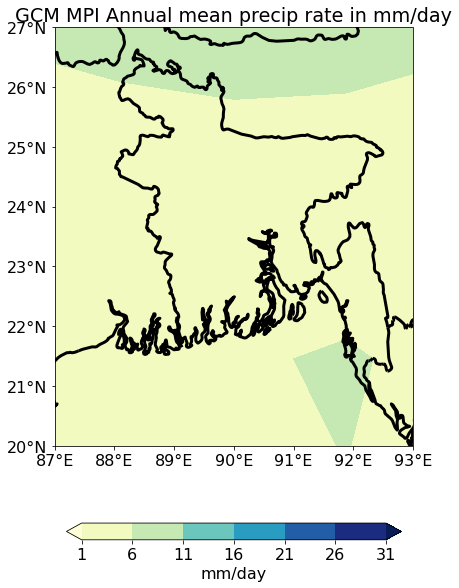

In [15]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

#plt.title('GCM MPI Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.title('GCM MPI Annual mean precip rate in mm/day' )


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_mpi_annual_mean.png")




